In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score, normalized_mutual_info_score
import random

class DBSCAN_Martingale():

  def neighborhood_ordre1(self, graph, eps):

    nodes = list(graph.nodes)
    shortest_path = {node: [] for node in nodes}

    for node in nodes:
      neighbors = list(graph.neighbors(node))
      shortest_path[node] = neighbors

    return shortest_path

  def dbscan_inner(self, is_core, neighborhoods, labels):

    label_num = 1
    stack = []
    nodes = list(range(labels.shape[0]))
    random.shuffle(nodes)

    for i in nodes:
      if labels[i] != 0 or not is_core[i]:
          continue

      # Depth-first search starting from i, ending at the non-core points.
      # This is very similar to the classic algorithm for computing connected
      # components, the difference being that we label non-core points as
      # part of a cluster (component), but don't expand their neighborhoods.
      while True:
        if labels[i] == 0:
          labels[i] = label_num
          if is_core[i]:
            neighb = neighborhoods[i]
            for v in neighb:
              if labels[v] == 0:
                stack.append(v)

        if len(stack) == 0:
            break
        i = stack.pop()

      label_num += 1

  def dbscan_star(self, graph, eps, min_points):

    # shortest path
    neighborhoods = self.neighborhood_ordre1(graph, eps)

    n_neighbors = np.array([len(neighborhoods[neighbors]) for neighbors in range(len(graph.nodes))])

    core_samples = np.array([1 if len(neighborhoods[node]) >= min_points else 0 for node in range(len(graph.nodes))])

    labels = np.full(len(graph.nodes), 0, np.intp)

    self.dbscan_inner(core_samples,neighborhoods, labels)

    return labels

  def propagate(self, graph, eps, min_points, labels):
    neighborhoods = self.neighborhood_ordre1(graph, eps)
    n_neighbors = np.array([len(neighborhoods[neighbors]) for neighbors in range(len(graph.nodes))])
    core_samples = np.asarray(n_neighbors >= min_points, dtype=np.uint8)
    clusters = np.unique(labels[labels!=0])

    for cluster in clusters:
      nodes_in_cluster = list(np.where((labels == cluster) & (~core_samples))[0])
      L = nodes_in_cluster
      while len(L) > 0:
        node = L.pop()
        neighbors = labels[neighborhoods[node]]
        k = np.array(neighborhoods[node])
        k = k[neighbors == 0]
        neighbors[neighbors == 0] = cluster
        labels[neighborhoods[node]] = neighbors
        L.extend(list(k))

  def fit_predict(self, graph, eps, MinPts, s):
    S = random.sample(MinPts, k=s)
    S = sorted(S, key=lambda x: -x)
    print(S)
    C = np.full(len(graph.nodes), 0, np.intp)
    for iter, min_points in enumerate(S):
      C_DBSCAN = self.dbscan_star(graph, eps, min_points)

      if np.any(C != 0):
        k = np.max(C)
        C_DBSCAN[C != 0] = 0
        C_DBSCAN[C_DBSCAN != 0] +=  k

      C += C_DBSCAN

    self.propagate(graph, eps, min_points, C)

    return C

In [ ]:
import networkx as nx

def load_synth_graph(path):
    # Read network.dat
    G = nx.Graph()
    with open(f'{path}network.dat', 'r') as f:
        for line in f:
            parts = line.split()
            node1 = int(parts[0]) - 1
            node2 = int(parts[1]) - 1
            G.add_edge(node1, node2)

    # Read community.dat
    communities = []
    with open(f'{path}community.dat', 'r') as f:
        for line in f:
            parts = line.split()
            node = int(parts[0]) - 1
            community = int(parts[1])
            communities.append(community)

    return G, communities

In [ ]:
G= nx.read_gml("polbooks.gml",label=None)

In [ ]:
G = nx.re

NodeView(('1000 Years for Revenge', 'Bush vs. the Beltway', "Charlie Wilson's War", 'Losing Bin Laden', 'Sleeping With the Devil', 'The Man Who Warned America', 'Why America Slept', 'Ghost Wars', 'A National Party No More', 'Bush Country', 'Dereliction of Duty', 'Legacy', 'Off with Their Heads', 'Persecution', "Rumsfeld's War", 'Breakdown', 'Betrayal', 'Shut Up and Sing', 'Meant To Be', 'The Right Man', 'Ten Minutes from Normal', "Hillary's Scheme", 'The French Betrayal of America', 'Tales from the Left Coast', 'Hating America', 'The Third Terrorist', 'Endgame', 'Spin Sisters', "All the Shah's Men", 'Dangerous Dimplomacy', 'The Price of Loyalty', 'House of Bush, House of Saud', 'The Death of Right and Wrong', 'Useful Idiots', "The O'Reilly Factor", 'Let Freedom Ring', 'Those Who Trespass', 'Bias', 'Slander', 'The Savage Nation', 'Deliver Us from Evil', 'Give Me a Break', 'The Enemy Within', 'The Real America', "Who's Looking Out for You?", 'The Official Handbook Vast Right Wing Conspir

In [ ]:
# Create a figure object with a larger size
plt.figure(figsize=(10, 8))
# Draw the graph
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_size=300, font_color="white", font_size=8)
# Display the graph
plt.show()

KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>

In [ ]:
# DBSCAN* clustering
eps = 1
s = 5
MinPts = range(5, 30)
dbscan_star = DBSCAN_Martingale()
labels = dbscan_star.fit_predict(G, eps, MinPts, s)

[27, 26, 21, 20, 18]


In [ ]:
max(labels)


4

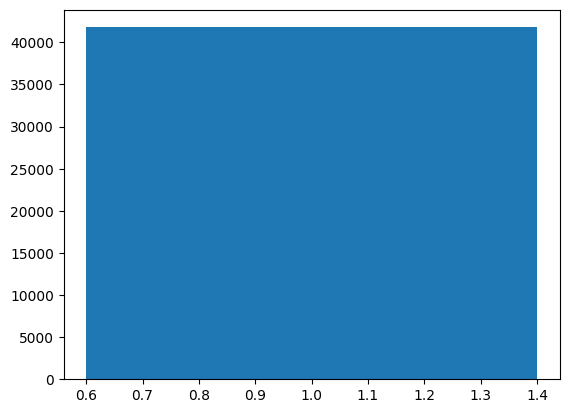

In [ ]:
unique_elements, counts = np.unique(labels, return_counts=True)
counts = sorted(counts, key=lambda x: -x)
plt.bar(x=unique_elements, height=counts)
plt.show()

In [ ]:
ground_truth = communities
max(ground_truth)
ground_truth = np.array([0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0])

In [ ]:
# Compare with ground truth using Adjusted Rand Index and Normalized Mutual Information
## ./benchmark -N 650 -k 4 -maxk 13 -mu 0.0 -minc 65 -maxc 65 -t1 1.89 -t2 3.54
ari = rand_score(ground_truth, labels)
nmi = normalized_mutual_info_score(ground_truth, labels)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.7939560439560439
Normalized Mutual Information: 0.511247357334346


In [ ]:
import pandas as pd

pd.crosstab(ground_truth, labels)

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
row_0,,,,,,,,,,,,,,,
1,0,0,0,0,0,64,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,65,0,0,0
3,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,55,0,10,0,0,0,0
5,0,53,0,0,0,0,12,0,0,0,0,0,0,0,0
6,0,0,0,56,0,0,0,0,0,0,0,0,0,9,0
7,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,24,25,0,0,16,0,0
9,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0
